<a href="https://colab.research.google.com/github/AenimaLabs/CienciaDatos0067/blob/main/Evaluacion_Final_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evaluación final Módulo 3

##Limpieza y Transformación de Datos (3 puntos)

* Carga el dataset en un DataFrame de Pandas.

* Identifica y trata valores perdidos en el dataset.

* Detecta y filtra outliers usando el método del rango intercuartílico (IQR).

* Reemplaza los valores de la columna "Razon_Migracion" usando mapeo de valores (ejemplo: "Económica" → "Trabajo", "Conflicto" → "Guerra").

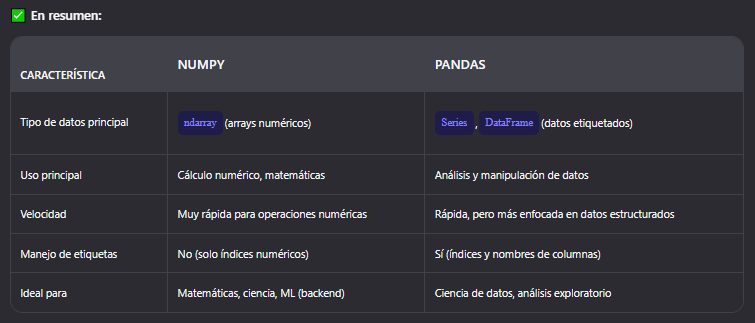

In [2]:
#IMPORTAR LIBRERÍAS
import pandas as pd #dataframe, series
import numpy as np # arreglos

#para utilizar arrchivos en drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#CARGAR EL DATASET
ruta = "/content/drive/MyDrive/Evaluaciones_0067/migracion2.csv"
migracion = pd.read_csv(ruta)
migracion_eliminar_nulos = migracion.copy()
migracion_reemplaza_nulos = migracion.copy()

migracion.head()

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.89
1,Siria,Alemania,2015,800000,Conflicto,2000,45000,0.55,0.94
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,NaN
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.93
4,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.89


In [4]:
print("Los tres primeros:")
display(migracion.head(3))

Los tres primeros:


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.89
1,Siria,Alemania,2015,800000,Conflicto,2000,45000,0.55,0.94
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,NaN


In [5]:
print("Los tres últimos:")
display(migracion.tail(3))

Los tres últimos:


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
7,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.85
8,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.85
9,Argentina,España,2021,110000,NaN,10000,30000,0.83,0.89


In [6]:
print("Tres al azar:")
display(migracion.sample(3))

Tres al azar:


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.93
6,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.85
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.89


In [7]:
migracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais_Origen         10 non-null     object 
 1   Pais_Destino        9 non-null      object 
 2   Año                 10 non-null     int64  
 3   Cantidad_Migrantes  10 non-null     int64  
 4   Razon_Migracion     9 non-null      object 
 5   PIB_Origen          10 non-null     int64  
 6   PIB_Destino         10 non-null     int64  
 7   IDH_Origen          10 non-null     float64
 8   IDH_Destino         9 non-null      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 852.0+ bytes


In [8]:
migracion.describe()

,Año,Cantidad_Migrantes,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
count,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
mean,2019.400000,322000.000000,4950.000000,31400.000000,0.659000,0.854444
std,2.270585,256636.361847,4199.272424,17708.754897,0.119578,0.101009
min,2015.000000,90000.000000,1000.000000,5000.000000,0.490000,0.600000
25%,2018.250000,127500.000000,2000.000000,19250.000000,0.565000,0.850000
50%,2019.500000,225000.000000,2850.000000,30000.000000,0.675000,0.890000
75%,2021.000000,450000.000000,8000.000000,42500.000000,0.755000,0.890000
max,2022.000000,800000.000000,13000.000000,65000.000000,0.830000,0.940000


In [9]:
#IDENTIFICAR VALORES PERDIDOS

display(migracion.isnull()) #consulta si hay datos nulos, si los hay True, sino False
display(migracion.isnull().sum()) #suma los valores nulos por columna


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False


,0
Pais_Origen,0
Pais_Destino,1
Año,0
Cantidad_Migrantes,0
Razon_Migracion,1
PIB_Origen,0
PIB_Destino,0
IDH_Origen,0
IDH_Destino,1


In [10]:
#TRATAMIENTO VALORES PERDIDOS (En migracion.csv no hay, así que utilizaremos migracion2.csv, al que se le borraron datos)

#Eliminando nulos
subset = ['Razon_Migracion', 'IDH_Destino']
migracion_eliminar_nulos.dropna(subset=subset, inplace=True) #inplace = True perrmite que las modificaciones se guarden en el mismo dataframe
migracion_eliminar_nulos.isnull().sum()

,0
Pais_Origen,0
Pais_Destino,1
Año,0
Cantidad_Migrantes,0
Razon_Migracion,0
PIB_Origen,0
PIB_Destino,0
IDH_Origen,0
IDH_Destino,0


In [11]:
migracion_eliminar_nulos.dropna(inplace=True) #borra todas las filas que encuentre con datos perdidos
migracion_eliminar_nulos.isnull().sum()

,0
Pais_Origen,0
Pais_Destino,0
Año,0
Cantidad_Migrantes,0
Razon_Migracion,0
PIB_Origen,0
PIB_Destino,0
IDH_Origen,0
IDH_Destino,0


In [12]:
migracion.info()
print("*" *60)
migracion_eliminar_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais_Origen         10 non-null     object 
 1   Pais_Destino        9 non-null      object 
 2   Año                 10 non-null     int64  
 3   Cantidad_Migrantes  10 non-null     int64  
 4   Razon_Migracion     9 non-null      object 
 5   PIB_Origen          10 non-null     int64  
 6   PIB_Destino         10 non-null     int64  
 7   IDH_Origen          10 non-null     float64
 8   IDH_Destino         9 non-null      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 852.0+ bytes
************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 8
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais_Origen         7 non-null    

In [13]:
migracion_reemplaza_nulos

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.89
1,Siria,Alemania,2015,800000,Conflicto,2000,45000,0.55,0.94
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,NaN
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.93
4,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.89
5,Afganistán,NaN,2022,500000,Conflicto,1000,5000,0.49,0.60
6,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.85
7,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.85
8,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.85
9,Argentina,España,2021,110000,NaN,10000,30000,0.83,0.89


In [14]:
#Reemplazar valores nulos

# Calcular la moda para Razon_Migracion y la media para IDH_Destino
moda_razon = migracion_reemplaza_nulos['Razon_Migracion'].mode()[0]
media_idh = migracion_reemplaza_nulos['IDH_Destino'].mean()

# Crear un diccionario con los valores de reemplazo para cada columna
valores_relleno = {
    'Razon_Migracion': moda_razon,
    'IDH_Destino': media_idh
}

# Rellenar los valores nulos utilizando el diccionario
migracion_reemplaza_nulos.fillna(valores_relleno, inplace=True)
migracion_reemplaza_nulos.isnull().sum()

,0
Pais_Origen,0
Pais_Destino,1
Año,0
Cantidad_Migrantes,0
Razon_Migracion,0
PIB_Origen,0
PIB_Destino,0
IDH_Origen,0
IDH_Destino,0


In [15]:
migracion_reemplaza_nulos

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.890000
1,Siria,Alemania,2015,800000,Conflicto,2000,45000,0.55,0.940000
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,0.854444
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
4,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.890000
5,Afganistán,NaN,2022,500000,Conflicto,1000,5000,0.49,0.600000
6,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.850000
7,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.850000
8,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.850000
9,Argentina,España,2021,110000,Económica,10000,30000,0.83,0.890000


In [16]:
migracion_reemplaza_nulos.fillna('Sin información', inplace=True)
display(migracion_reemplaza_nulos)

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.890000
1,Siria,Alemania,2015,800000,Conflicto,2000,45000,0.55,0.940000
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,0.854444
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
4,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.890000
5,Afganistán,Sin información,2022,500000,Conflicto,1000,5000,0.49,0.600000
6,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.850000
7,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.850000
8,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.850000
9,Argentina,España,2021,110000,Económica,10000,30000,0.83,0.890000


In [17]:
#Duplicados
migracion_reemplaza_nulos.duplicated().sum()

np.int64(0)

In [42]:
#si es que hay duplicados
migracion_reemplaza_nulos.drop_duplicates(inplace=True)
migracion_reemplaza_nulos.duplicated().sum()

migracion_limpia = migracion_reemplaza_nulos.copy()

In [19]:
# Detectar outliers usando IQR para 'Cantidad_Migrantes'
Q1 = migracion_limpia['Cantidad_Migrantes'].quantile(0.25)
Q3 = migracion_limpia['Cantidad_Migrantes'].mean()
Q3 = migracion_limpia['Cantidad_Migrantes'].quantile(0.75)
IQR = Q3 - Q1
lim_inf= Q1 - 1.5 * IQR
lim_sup= Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Limite inferior: {lim_inf}")
print(f"Limite superior: {lim_sup}")


Q1: 127500.0
Q3: 450000.0
IQR: 322500.0
Limite inferior: -356250.0
Limite superior: 933750.0


In [20]:
#  Conocer los outliers
lim_inf_ajustado = max(0, lim_inf) #coloca 0 como el valor máximo
outliers = migracion_limpia[(migracion_limpia['Cantidad_Migrantes'] < lim_inf_ajustado) | (migracion_limpia['Cantidad_Migrantes'] > lim_sup)]
outliers
#no tiene ninguno, y eso es muy fome, mejor creamos uno

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino


In [21]:
# type(migracion_limpia['Cantidad_Migrantes'])
display(migracion_limpia['Cantidad_Migrantes'])

,Cantidad_Migrantes
0,250000
1,800000
2,300000
3,150000
4,120000
5,500000
6,700000
7,200000
8,90000
9,110000


In [22]:
# Modificar el valor de la primera fila en 'Cantidad_Migrantes' para crear un outlier
# Puedes elegir un valor significativamente mayor que el limite superior calculado (933750.0)
migracion_limpia.loc[1, 'Cantidad_Migrantes'] = 2000000

# Mostrar el DataFrame para verificar el cambio
display(migracion_limpia)

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.890000
1,Siria,Alemania,2015,2000000,Conflicto,2000,45000,0.55,0.940000
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,0.854444
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
4,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.890000
5,Afganistán,Sin información,2022,500000,Conflicto,1000,5000,0.49,0.600000
6,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.850000
7,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.850000
8,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.850000
9,Argentina,España,2021,110000,Económica,10000,30000,0.83,0.890000


In [23]:
outliers = migracion_limpia[(migracion_limpia['Cantidad_Migrantes'] < lim_inf_ajustado) | (migracion_limpia['Cantidad_Migrantes'] > lim_sup)]
outliers

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
1,Siria,Alemania,2015,2000000,Conflicto,2000,45000,0.55,0.94


In [24]:
migracion_limpia = migracion_limpia[(migracion_limpia['Cantidad_Migrantes'] >= lim_inf_ajustado) & (migracion_limpia['Cantidad_Migrantes'] <= lim_sup)]
migracion_limpia
#fíjense en los índices

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.890000
2,México,EEUU,2020,300000,Económica,9000,65000,0.78,0.854444
3,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
4,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.890000
5,Afganistán,Sin información,2022,500000,Conflicto,1000,5000,0.49,0.600000
6,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.850000
7,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.850000
8,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.850000
9,Argentina,España,2021,110000,Económica,10000,30000,0.83,0.890000


In [25]:
#resetear indices
migracion_limpia.reset_index(drop=True, inplace=True)
migracion_limpia

,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Económica,5000,30000,0.70,0.890000
1,México,EEUU,2020,300000,Económica,9000,65000,0.78,0.854444
2,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
3,Bangladesh,Italia,2021,120000,Económica,2000,35000,0.61,0.890000
4,Afganistán,Sin información,2022,500000,Conflicto,1000,5000,0.49,0.600000
5,Ucrania,Polonia,2022,700000,Conflicto,13000,18000,0.77,0.850000
6,Filipinas,Arabia Saudita,2017,200000,Económica,3200,23000,0.71,0.850000
7,Haití,Chile,2019,90000,Económica,1800,15000,0.50,0.850000
8,Argentina,España,2021,110000,Económica,10000,30000,0.83,0.890000


In [26]:
# Reemplazar valores en 'Razon_Migracion'
mapeo = {
    'Económica': 'Trabajo',
    'Conflicto': 'Guerra',
    'Educación': 'Estudios',
    'Familia': 'Reunificación familiar',
    'Otra': 'Otras razones'
}
migracion_limpia['Razon_Migracion'] = migracion_limpia['Razon_Migracion'].replace(mapeo)
migracion_limpia

/tmp/ipython-input-26-4162078780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migracion_limpia['Razon_Migracion'] = migracion_limpia['Razon_Migracion'].replace(mapeo)


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Trabajo,5000,30000,0.70,0.890000
1,México,EEUU,2020,300000,Trabajo,9000,65000,0.78,0.854444
2,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
3,Bangladesh,Italia,2021,120000,Trabajo,2000,35000,0.61,0.890000
4,Afganistán,Sin información,2022,500000,Guerra,1000,5000,0.49,0.600000
5,Ucrania,Polonia,2022,700000,Guerra,13000,18000,0.77,0.850000
6,Filipinas,Arabia Saudita,2017,200000,Trabajo,3200,23000,0.71,0.850000
7,Haití,Chile,2019,90000,Trabajo,1800,15000,0.50,0.850000
8,Argentina,España,2021,110000,Trabajo,10000,30000,0.83,0.890000


##Análisis Exploratorio (2 puntos)

* Muestra las 5 primeras filas del dataset.

* Obtén información general del dataset con .info() y .describe().

* Calcula estadísticas clave:
  * Media y mediana de la cantidad de migrantes.
  * PIB promedio de los países de origen y destino: Usa .value_counts() para contar cuántos movimientos de migración ocurrieron por cada razón.

In [27]:
# Mostrar primeras 5 filas
print("\nPrimeras 5 filas del dataset:")
display(migracion_limpia.head())


Primeras 5 filas del dataset:


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
0,Venezuela,España,2018,250000,Trabajo,5000,30000,0.70,0.890000
1,México,EEUU,2020,300000,Trabajo,9000,65000,0.78,0.854444
2,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000
3,Bangladesh,Italia,2021,120000,Trabajo,2000,35000,0.61,0.890000
4,Afganistán,Sin información,2022,500000,Guerra,1000,5000,0.49,0.600000


In [28]:
print("\nInformación del dataset:")
migracion_limpia.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pais_Origen         9 non-null      object 
 1   Pais_Destino        9 non-null      object 
 2   Año                 9 non-null      int64  
 3   Cantidad_Migrantes  9 non-null      int64  
 4   Razon_Migracion     9 non-null      object 
 5   PIB_Origen          9 non-null      int64  
 6   PIB_Destino         9 non-null      int64  
 7   IDH_Origen          9 non-null      float64
 8   IDH_Destino         9 non-null      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 780.0+ bytes


In [29]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
migracion_limpia.describe()


Estadísticas descriptivas:


,Año,Cantidad_Migrantes,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,2019.888889,268888.888889,5277.777778,29888.888889,0.671111,0.844938
std,1.763834,205818.150587,4316.184014,18086.213288,0.120150,0.095844
min,2017.000000,90000.000000,1000.000000,5000.000000,0.490000,0.600000
25%,2019.000000,120000.000000,2000.000000,18000.000000,0.610000,0.850000
50%,2020.000000,200000.000000,3200.000000,30000.000000,0.700000,0.854444
75%,2021.000000,300000.000000,9000.000000,35000.000000,0.770000,0.890000
max,2022.000000,700000.000000,13000.000000,65000.000000,0.830000,0.930000


In [30]:
# Media y mediana de migrantes
media_migrantes = migracion_limpia['Cantidad_Migrantes'].mean()
mediana_migrantes = migracion_limpia['Cantidad_Migrantes'].median()
print(f"\nMedia de migrantes: {media_migrantes:.2f}")
print(f"Mediana de migrantes: {mediana_migrantes:.2f}")


Media de migrantes: 268888.89
Mediana de migrantes: 200000.00


In [31]:
# PIB promedio de países de origen y destino
pib_promedio_origen = migracion_limpia['PIB_Origen'].mean()
pib_promedio_destino = migracion_limpia['PIB_Destino'].mean()
print(f"PIB promedio de origen: {pib_promedio_origen:.2f}")
print(f"PIB promedio de destino: {pib_promedio_destino:.2f}")

PIB promedio de origen: 5277.78
PIB promedio de destino: 29888.89


In [32]:
# Contar movimientos por razón de migración
print("\nMovimientos por razón de migración:")
print(migracion_limpia['Razon_Migracion'].value_counts())


Movimientos por razón de migración:
Razon_Migracion
Trabajo      6
Guerra       2
Educativa    1
Name: count, dtype: int64


## Agrupamiento y Sumarización de Datos (2 puntos)
* Agrupa los datos por "Razon_Migracion" y calcula la suma total de migrantes para cada
categoría.
* Obtén la media del IDH de los países de origen por cada tipo de migración.
* Ordena el DataFrame de mayor a menor cantidad de migrantes.

In [33]:
# Agrupar por 'Razon_Migracion' y sumar cantidad de migrantes
total_migrantes_por_razon = migracion_limpia.groupby('Razon_Migracion')['Cantidad_Migrantes'].sum().sort_values(ascending=False)
print("\nTotal de migrantes por razón:")
print(total_migrantes_por_razon)


Total de migrantes por razón:
Razon_Migracion
Guerra       1200000
Trabajo      1070000
Educativa     150000
Name: Cantidad_Migrantes, dtype: int64


In [34]:
# Media del IDH de los países de origen por tipo de migración
media_idh_origen_por_razon = migracion_limpia.groupby('Razon_Migracion')['IDH_Origen'].mean()
print("\nMedia del IDH de origen por razón de migración:")
print(media_idh_origen_por_razon)


Media del IDH de origen por razón de migración:
Razon_Migracion
Educativa    0.650000
Guerra       0.630000
Trabajo      0.688333
Name: IDH_Origen, dtype: float64


In [35]:
# Ordenar DataFrame por cantidad de migrantes de mayor a menor
df_ordenado = migracion_limpia.sort_values(by='Cantidad_Migrantes', ascending=False)

## Filtros y Selección de Datos (2 puntos)
* Filtra y muestra solo las migraciones por conflicto.
* Selecciona y muestra las filas donde el IDH del país de destino sea mayor a 0.90.
* Crea una nueva columna "Diferencia_IDH" que calcule la diferencia de IDH entre país de
origen y destino.

In [36]:
migracion_limpia[['Razon_Migracion', 'IDH_Destino']]

,Razon_Migracion,IDH_Destino
0,Trabajo,0.890000
1,Trabajo,0.854444
2,Educativa,0.930000
3,Trabajo,0.890000
4,Guerra,0.600000
5,Guerra,0.850000
6,Trabajo,0.850000
7,Trabajo,0.850000
8,Trabajo,0.890000


In [37]:
# Filtrar solo migraciones por conflicto (ahora etiquetadas como 'Guerra')
df_conflictos = migracion_limpia[migracion_limpia['Razon_Migracion'] == 'Guerra']
print("\nMigraciones por conflicto:")
df_conflictos.head()


Migraciones por conflicto:


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
4,Afganistán,Sin información,2022,500000,Guerra,1000,5000,0.49,0.60
5,Ucrania,Polonia,2022,700000,Guerra,13000,18000,0.77,0.85


In [38]:
# Seleccionar filas donde el IDH del país de destino sea mayor a 0.90
df_idh_alto = migracion_limpia[migracion_limpia['IDH_Destino'] > 0.90]
print("\nMigraciones hacia países con IDH > 0.90:")
df_idh_alto.head()


Migraciones hacia países con IDH > 0.90:


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino
2,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.93


In [39]:
# Crear nueva columna 'Diferencia_IDH'
migracion_limpia['Diferencia_IDH'] = migracion_limpia['IDH_Destino'] - migracion_limpia['IDH_Origen']
print("\nDataFrame con columna 'Diferencia_IDH':")
migracion_limpia.head()


DataFrame con columna 'Diferencia_IDH':


,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino,Diferencia_IDH
0,Venezuela,España,2018,250000,Trabajo,5000,30000,0.70,0.890000,0.190000
1,México,EEUU,2020,300000,Trabajo,9000,65000,0.78,0.854444,0.074444
2,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000,0.280000
3,Bangladesh,Italia,2021,120000,Trabajo,2000,35000,0.61,0.890000,0.280000
4,Afganistán,Sin información,2022,500000,Guerra,1000,5000,0.49,0.600000,0.110000


## Exportar Datos

In [40]:
# Guardar el DataFrame limpio en un archivo CSV
migracion_limpia.to_csv('Migracion_Limpio.csv')
# migracion_limpia.to_csv('Migracion_Limpio.csv', index=False)
print("\nArchivo exportado como 'Migracion_Limpio.csv'")


Archivo exportado como 'Migracion_Limpio.csv'


In [41]:
nueva_migracion = pd.read_csv('Migracion_Limpio.csv')
nueva_migracion.head()

,Unnamed: 0,Pais_Origen,Pais_Destino,Año,Cantidad_Migrantes,Razon_Migracion,PIB_Origen,PIB_Destino,IDH_Origen,IDH_Destino,Diferencia_IDH
0,0,Venezuela,España,2018,250000,Trabajo,5000,30000,0.70,0.890000,0.190000
1,1,México,EEUU,2020,300000,Trabajo,9000,65000,0.78,0.854444,0.074444
2,2,India,Canadá,2019,150000,Educativa,2500,48000,0.65,0.930000,0.280000
3,3,Bangladesh,Italia,2021,120000,Trabajo,2000,35000,0.61,0.890000,0.280000
4,4,Afganistán,Sin información,2022,500000,Guerra,1000,5000,0.49,0.600000,0.110000
